
# Experiment 3:	Implementation of Multi-Layer Perceptron


### **1. Objective**
WAP to implement a three-layer neural network using Tensor flow library (only, no keras) to classify MNIST handwritten digits dataset. Demonstrate the implementation of feed-forward and back-propagation approaches.


### **2. Description of the Model**
This model is a simple **feedforward neural network (FNN)** designed for classifying handwritten digits from the **MNIST dataset**. The architecture consists of:
- **Input Layer**: 784 neurons (flattened 28×28 grayscale images)
- **Hidden Layer 1**: 128 neurons with Sigmoid activation
- **Hidden Layer 2**: 64 neurons with Sigmoid activation
- **Output Layer**: 10 neurons (one for each digit 0-9), using raw logits
- **Loss Function**: Softmax cross-entropy
- **Optimizer**: Gradient Descent
- **Performance Metric**: Accuracy

The model is trained for **15 epochs** using mini-batch gradient descent (batch size = 150).

### **3. Python Implementation**

Install & Import Dependencies

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Disable eager execution for TF 2.x compatibility with TF 1.x code
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset
mnist_data = tfds.load("mnist", as_supervised=True)
train_data, test_data = mnist_data["train"], mnist_data["test"]

Load & Preprocess MNIST Dataset

In [15]:
# Load MNIST dataset
mnist_data = tfds.load("mnist", as_supervised=True)
train_data, test_data = mnist_data["train"], mnist_data["test"]

# Preprocess function: Flatten and Normalize
def preprocess(image, label):
    image = tf.reshape(image, [-1])  # Flatten (28x28 → 784)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize (0-255 → 0-1)
    label = tf.one_hot(label, depth=10)  # One-hot encode
    return image, label

# Training parameters
batch_size = 150
num_epochs = 15
steps_per_epoch = 60000 // batch_size  # MNIST has 60,000 training images

# Apply preprocessing, shuffle, and batch
train_data = train_data.map(preprocess).shuffle(10000).batch(batch_size)
test_data = test_data.map(preprocess).batch(batch_size)



Create dataset iterators



In [16]:
iterator = tf.compat.v1.data.make_initializable_iterator(train_data)
iterator_test = tf.compat.v1.data.make_initializable_iterator(test_data)
next_batch = iterator.get_next()
next_test_batch = iterator_test.get_next()

Define Model Architecture

In [17]:
# Define placeholders
X = tf.compat.v1.placeholder(tf.float32, shape=[None, 784])
Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 10])

# Define network parameters
weights = {
    "h1": tf.Variable(tf.random.normal([784, 128])),
    "h2": tf.Variable(tf.random.normal([128, 64])),
    "out": tf.Variable(tf.random.normal([64, 10])),
}
biases = {
    "b1": tf.Variable(tf.random.normal([128])),
    "b2": tf.Variable(tf.random.normal([64])),
    "out": tf.Variable(tf.random.normal([10])),
}

# Define forward propagation function
def forward_propagation(x):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights["h1"]), biases["b1"]))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights["h2"]), biases["b2"]))
    output_layer = tf.add(tf.matmul(layer2, weights["out"]), biases["out"])
    return output_layer




Define Loss, Optimizer & Accuracy

In [18]:
# Define loss function
logits = forward_propagation(X)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Optimizer
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.2).minimize(loss)


# Define accuracy metric
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))




Train and save the Model

In [19]:
# Store loss & accuracy per epoch
train_losses = []
train_accuracies = []

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(num_epochs):
        sess.run(iterator.initializer)
        avg_loss = 0
        avg_accuracy = 0

        for _ in range(steps_per_epoch):
            try:
                batch_x, batch_y = sess.run(next_batch)
                _, l, acc = sess.run([optimizer, loss, accuracy], feed_dict={X: batch_x, Y: batch_y})
                avg_loss += l / steps_per_epoch
                avg_accuracy += acc / steps_per_epoch
            except tf.errors.OutOfRangeError:
                sess.run(iterator.initializer)

        train_losses.append(avg_loss)
        train_accuracies.append(avg_accuracy)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy*100:.2f}%")
    print(f"Final Accuracy: {avg_accuracy*100:.2f}%")
    print("Training Completed!")


    saver = tf.compat.v1.train.Saver()
    save_path = saver.save(sess, "./mnist_model.ckpt")
    print(f"Model saved at: {save_path}")


Epoch 1, Loss: 1.5572, Accuracy: 52.80%
Epoch 2, Loss: 0.7684, Accuracy: 75.28%
Epoch 3, Loss: 0.5999, Accuracy: 81.08%
Epoch 4, Loss: 0.5173, Accuracy: 83.82%
Epoch 5, Loss: 0.4658, Accuracy: 85.51%
Epoch 6, Loss: 0.4289, Accuracy: 86.80%
Epoch 7, Loss: 0.4015, Accuracy: 87.64%
Epoch 8, Loss: 0.3787, Accuracy: 88.33%
Epoch 9, Loss: 0.3596, Accuracy: 88.92%
Epoch 10, Loss: 0.3435, Accuracy: 89.53%
Epoch 11, Loss: 0.3292, Accuracy: 89.98%
Epoch 12, Loss: 0.3164, Accuracy: 90.34%
Epoch 13, Loss: 0.3049, Accuracy: 90.79%
Epoch 14, Loss: 0.2946, Accuracy: 91.03%
Epoch 15, Loss: 0.2852, Accuracy: 91.37%
Final Accuracy: 91.37%
Training Completed!
Model saved at: ./mnist_model.ckpt



---
## **4. Description of the Code**
- **Preprocessing**: Images are flattened (28×28 → 784) and normalized (0-255 → 0-1). Labels are one-hot encoded.
- **Neural Network Architecture**:

  *  Input layer: 784 neurons (flattened image)

  *  Hidden Layer 1: 128 neurons (sigmoid activation)

  *  Hidden Layer 2: 64 neurons (sigmoid activation)

  *  Output Layer: 10 neurons (softmax for classification)
- **Training Process**:
  - **Batch Size**: 150
  - **Epochs**: 15
  - **Loss Function**: Softmax Cross-Entropy
  - **Optimizer**: Gradient Descent
  - The model is trained using mini-batch gradient descent

- **Performance Tracking**: Loss and Accuracy are recorded and plotted.

---


#**5.Evaluate Model on Test Set**

Testing the trained model and predicting some output

Model restored!



Test Accuracy: 90.58%





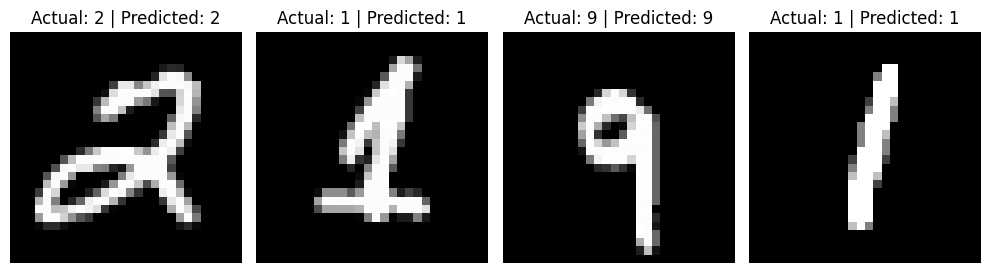

In [23]:
with tf.compat.v1.Session() as sess:
    # Restore saved model
    saver.restore(sess, "./mnist_model.ckpt")
    print("Model restored!")
    print("\n\n")
    sess.run(iterator_test.initializer)

    #check test accuracy
    test_accuracy = 0
    test_steps = 10000 // batch_size  # 10,000 test images

    for _ in range(test_steps):
        batch_x, batch_y = sess.run(next_test_batch)
        acc = sess.run(accuracy, feed_dict={X: batch_x, Y: batch_y})
        test_accuracy += acc / test_steps

    print(f"Test Accuracy: {test_accuracy *100:.2f}%")
    print("\n\n")

    # Initialize test dataset iterator
    sess.run(iterator_test.initializer)

    # Fetch test images and display predictions
    fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # Horizontal display

    for i in range(4):
        batch_x, batch_y = sess.run(next_test_batch)  # Fetch test batch
        pred = sess.run(tf.argmax(logits, 1), feed_dict={X: batch_x})
        actual = sess.run(tf.argmax(batch_y, 1))  # Convert one-hot labels back to integers

        # Display image
        axes[i].imshow(batch_x[0].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"Actual: {actual[0]} | Predicted: {pred[0]}")
        axes[i].axis("off")  # Hide axis for cleaner visualization

    plt.tight_layout()
    plt.show()


Plotting Accuracy vs Loss Curve

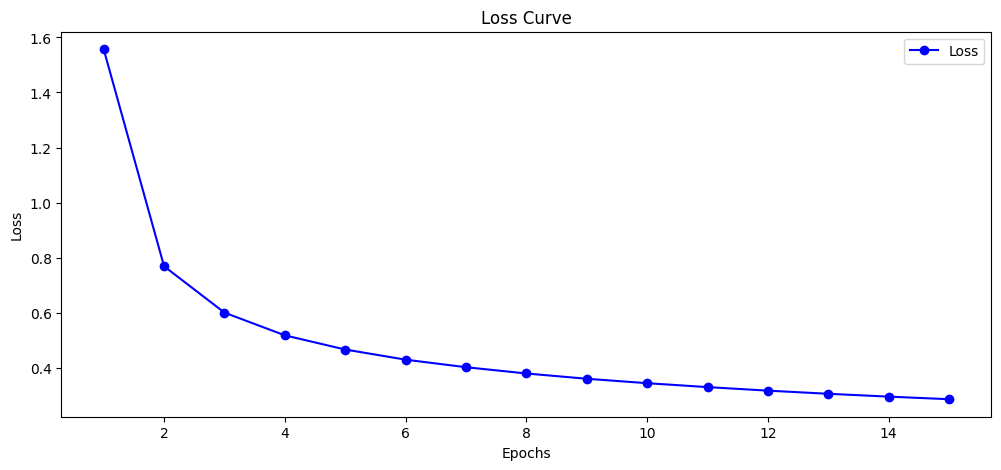

In [24]:
#  Plot Loss & Accuracy Curves
plt.figure(figsize=(12, 5))

plt.plot(range(1, num_epochs+1), train_losses, marker='o', linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()



Plotting Accuracy vs Epochs graph

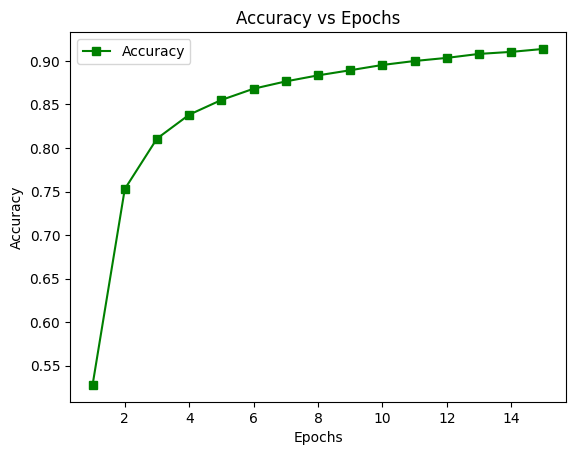

In [28]:
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='s', linestyle='-', color='g', label="Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.show()



- **Training Accuracy**: The model achieves approximately 91% training accuracy.
- **Testing Accuracy**: The model achieves approximately 90% training accuracy.
- **Loss Curve**: The loss decreases over epochs, indicating convergence.




---
## **6. My Comments (Limitations & Scope for Improvement)**
### **Limitations**:
- **Sigmoid Activation**: May cause vanishing gradient issues.
-  Accuracy never reaches above 95%

### **Scope for Improvement**:
- Replace **Sigmoid with ReLU** for faster learning.
- Hyperparameter tuning (learning rate, batch size) to optimize performance.
- Use of **Adam optmizer** over **Gradient Descent** to gain more accuracy
- Data augmentation to improve generalization.



